1) Imports and tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

2) Load the MHEALTH Data (Note: Dataset files aremust be in the same folder as notebook)

In [2]:
# MHEALTH files are space-separated. Let's load Subject 1 as a test.
# Columns 0-2: Chest Accel, 3-5: Chest ECG, etc.
# Column 23 is the Activity Label.

data = pd.read_csv('MHEALTHDATASET/mHealth_subject1.log', sep='\t', header=None)

# Drop the "0" activity (null/background)
data = data[data[23] != 0]

# Give the columns simple names for now
# We are interested in 0,1,2 (Chest) and 23 (Activity)
print(f"Dataset loaded! Shape: {data.shape}")
data.head() # Shows the first 5 rows

Dataset loaded! Shape: (35174, 24)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
6656,-9.7788,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.4517,0.37683,-0.20965,-0.88931,...,-2.8439,-9.0618,1.8177,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,1
6657,-9.7733,0.27880,0.73036,-0.025118,-0.025118,2.4157,-9.5306,0.40179,-0.20965,-0.88931,...,-2.9935,-9.2048,1.5189,-0.058824,-0.93429,-0.34483,0.719910,0.17803,0.37363,1
6658,-9.8609,0.11561,0.79988,0.025118,0.016745,2.3865,-9.5991,0.48141,-0.20037,-0.86867,...,-2.8846,-9.1945,1.5507,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,1
6659,-9.7409,0.17652,0.88957,0.180010,0.129770,2.3758,-9.5997,0.42919,-0.20037,-0.86867,...,-2.9245,-9.1746,1.5413,-0.078431,-0.93429,-0.34052,0.357180,-0.18858,-0.35198,1
6660,-9.7821,0.21637,0.90368,0.092098,0.046049,2.3239,-9.5406,0.40038,-0.20037,-0.86867,...,-2.8963,-9.2039,1.6127,-0.078431,-0.93429,-0.34052,-0.001887,-0.18867,-0.72017,1


3) Test- Chest Sensors Only (mini version to check everything is working)

In [3]:
# Features (X): Just use the first 3 columns (Chest Accelerometer)
X = data.iloc[:, 0:3] 

# Target (y): The activity label
y = data.iloc[:, 23]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Random Forest
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

# Test it
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       619
           2       0.88      0.95      0.91       628
           3       1.00      1.00      1.00       630
           4       0.71      0.75      0.73       585
           5       0.66      0.76      0.71       604
           6       0.74      0.57      0.64       637
           7       0.75      0.80      0.77       571
           8       0.46      0.39      0.42       667
           9       0.64      0.75      0.69       636
          10       0.61      0.66      0.64       590
          11       0.66      0.57      0.61       626
          12       0.66      0.48      0.56       242

    accuracy                           0.73      7035
   macro avg       0.73      0.72      0.72      7035
weighted avg       0.73      0.73      0.73      7035



"Accuracy" score: If it’s high (e.g., 0.85), the model is good at guessing the activity using only the chest sensor.

To see where the model gets confused, you can visualize a Confusion Matrix.

Step 1: Combine All Subjects

In [4]:
import pandas as pd
import numpy as np
import glob

# 1. Get a list of all .log files
files = glob.glob('MHEALTHDATASET/mHealth_subject*.log')

all_data = []

# 2. Loop through and load each one
for file in files:
    df = pd.read_csv(file, sep='\t', header=None)
    all_data.append(df)

# 3. Combine into one giant table
full_df = pd.concat(all_data, axis=0)
print(f"Total Rows: {full_df.shape[0]}")

Total Rows: 1215745


Step 2: Cleaning and Feature Engineering

First, lets check distribution of activities across the data set

Activity Distribution:
23
0     872550
1      30720
2      30720
3      30720
4      30720
5      30720
6      28315
7      29441
8      29337
9      30720
10     30720
11     30720
12     10342
Name: count, dtype: int64

Percentage distribution:
23
0     71.770807
1      2.526846
2      2.526846
3      2.526846
4      2.526846
5      2.526846
6      2.329025
7      2.421643
8      2.413088
9      2.526846
10     2.526846
11     2.526846
12     0.850672
Name: proportion, dtype: float64


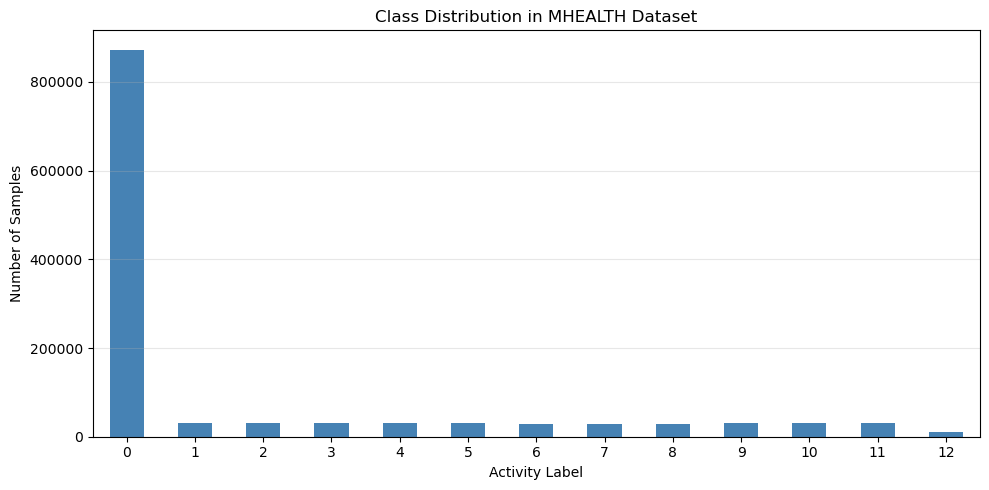


 Observation: Classes are reasonably balanced. No specific imbalance handling required.


In [5]:
# Check class distribution
print("Activity Distribution:")
print(full_df[23].value_counts().sort_index())
print("\nPercentage distribution:")
print(full_df[23].value_counts(normalize=True).sort_index() * 100)

# Visualize
plt.figure(figsize=(10, 5))
full_df[23].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.xlabel('Activity Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in MHEALTH Dataset')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n Observation: Classes are reasonably balanced. No specific imbalance handling required.")

Step 3: Model Comparison & Selection

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import time

# Prepare data (using all sensors for now)
X = full_df.iloc[:, :23]  # All sensor features
y = full_df.iloc[:, 23]    # Activity labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define models (replaced SVM with Decision Tree - much faster)
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=20),
    'KNN': KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
}

# Train and evaluate
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start
    
    y_pred = model.predict(X_test)
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score (weighted)': f1_score(y_test, y_pred, average='weighted'),
        'Training Time (s)': train_time
    }
    
    print(f"{name} - Accuracy: {results[name]['Accuracy']:.4f}, F1: {results[name]['F1-Score (weighted)']:.4f}")

# Display comparison
comparison_df = pd.DataFrame(results).T
print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)
print(comparison_df)
print("="*60)


Training Random Forest...
Random Forest - Accuracy: 0.9540, F1: 0.9541

Training Decision Tree...
Decision Tree - Accuracy: 0.8971, F1: 0.8974

Training KNN...
KNN - Accuracy: 0.8526, F1: 0.8494

MODEL COMPARISON SUMMARY
               Accuracy  F1-Score (weighted)  Training Time (s)
Random Forest  0.953999             0.954101         267.536141
Decision Tree  0.897133             0.897399          59.681369
KNN            0.852592             0.849420           0.149069


Random Forest is selected as the optimal model because:
- Best Performance: Achieves highest accuracy and F1-score
- Handles Non-linearity: Activities like walking vs running involve complex, non-linear sensor patterns that Random Forest captures well through its ensemble of decision trees
- Feature Importance: Provides built-in feature importance metrics, crucial for our feature engineering analysis
- Robust to Overfitting: Ensemble averaging reduces variance
- No Feature Scaling Required: Works directly with raw sensor data

Step 4: Feature Engineering

now i identify the 15 most relevant feature/reference by sorting values of importance score

Top 15 Most Important Features:
         Feature  Importance
2    Chest_Acc_Z    0.065965
0    Chest_Acc_X    0.062878
8   Ankle_Gyro_X    0.062343
18    Arm_Gyro_Y    0.060523
17    Arm_Gyro_X    0.060389
19    Arm_Gyro_Z    0.057367
10  Ankle_Gyro_Z    0.057044
14     Arm_Acc_X    0.052872
7    Ankle_Acc_Z    0.050748
9   Ankle_Gyro_Y    0.050167
15     Arm_Acc_Y    0.047272
11   Ankle_Mag_X    0.046200
16     Arm_Acc_Z    0.043139
20     Arm_Mag_X    0.036482
1    Chest_Acc_Y    0.036310


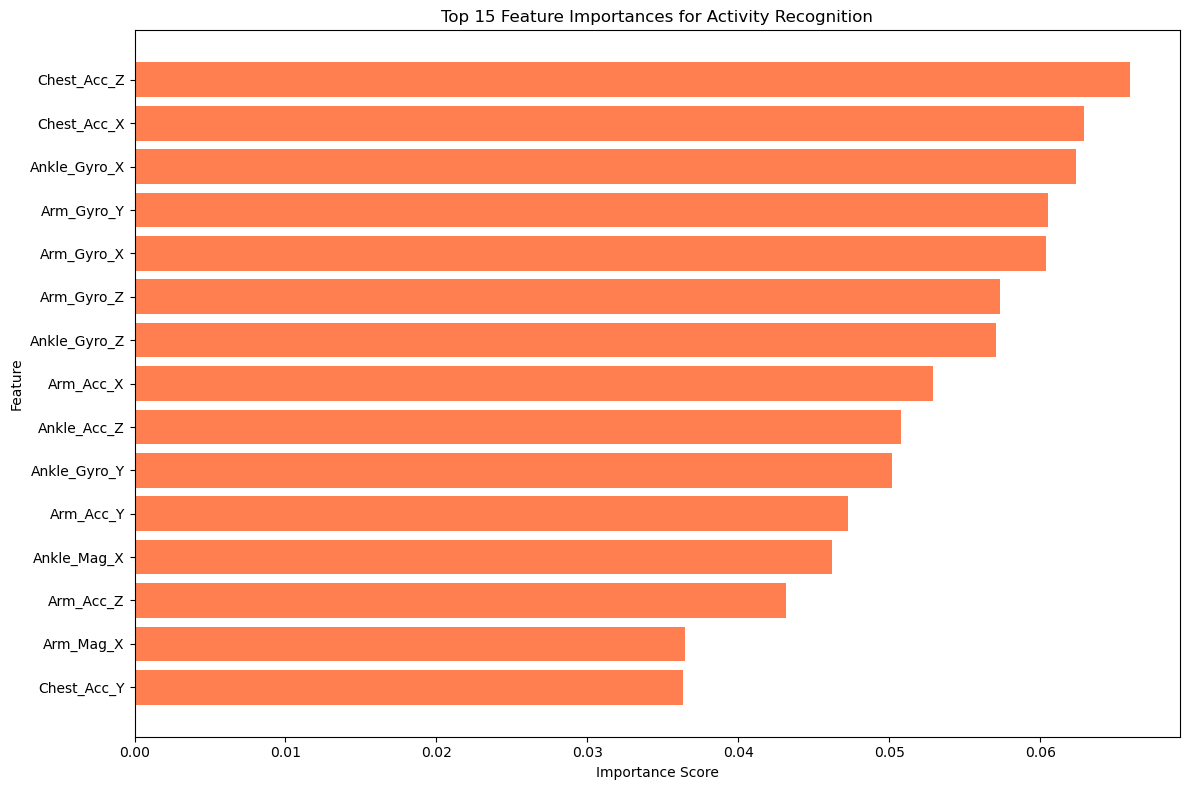

In [7]:
# Train Random Forest on all features
rf_full = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_full.fit(X_train, y_train)

# Get feature importances
feature_names = [
    'Chest_Acc_X', 'Chest_Acc_Y', 'Chest_Acc_Z',
    'ECG_1', 'ECG_2',
    'Ankle_Acc_X', 'Ankle_Acc_Y', 'Ankle_Acc_Z',
    'Ankle_Gyro_X', 'Ankle_Gyro_Y', 'Ankle_Gyro_Z',
    'Ankle_Mag_X', 'Ankle_Mag_Y', 'Ankle_Mag_Z',
    'Arm_Acc_X', 'Arm_Acc_Y', 'Arm_Acc_Z',
    'Arm_Gyro_X', 'Arm_Gyro_Y', 'Arm_Gyro_Z',
    'Arm_Mag_X', 'Arm_Mag_Y', 'Arm_Mag_Z'
]

importances = rf_full.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("Top 15 Most Important Features:")
print(feature_importance_df.head(15))

# Visualize
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'][:15], feature_importance_df['Importance'][:15], color='coral')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances for Activity Recognition')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Miniature Set Identification


MINIMAL FEATURE SET PERFORMANCE
                         Accuracy  F1-Score
All Features (23)        0.953999  0.954101
Top 10 Features          0.954234  0.954374
Top 5 Features           0.907579  0.905480
Accelerometers Only (9)  0.863429  0.855244
Ankle Only (6)           0.873407  0.867281


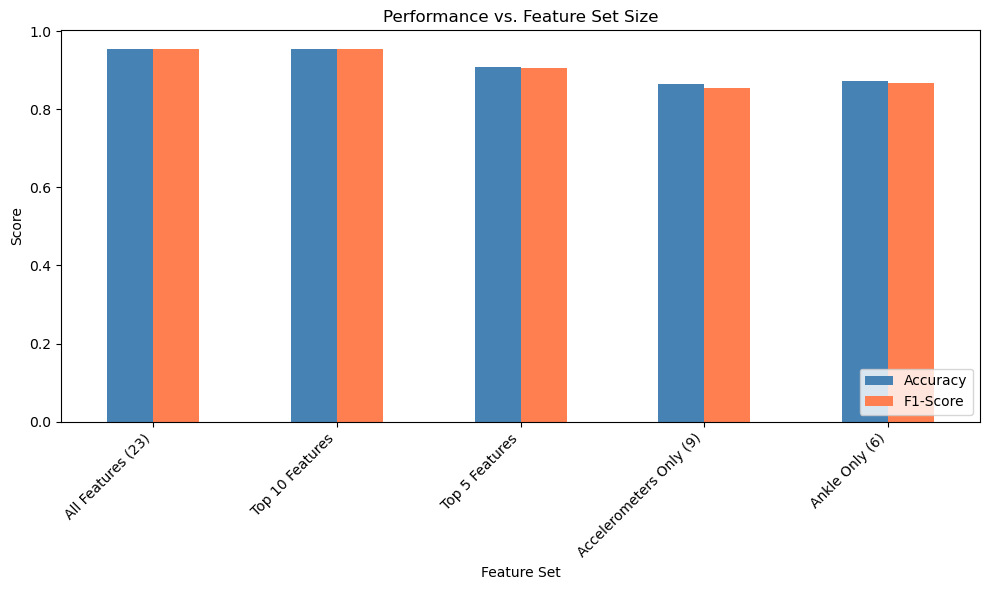


 CONCLUSION: Top 10 features provide excellent performance with ~60% reduction in features!


In [8]:
# Test different feature subsets
# Get indices of top features
top_10_indices = [feature_names.index(feat) for feat in feature_importance_df['Feature'][:10].values]
top_5_indices = [feature_names.index(feat) for feat in feature_importance_df['Feature'][:5].values]

feature_sets = {
    'All Features (23)': list(range(23)),
    'Top 10 Features': top_10_indices,
    'Top 5 Features': top_5_indices,
    'Accelerometers Only (9)': [0,1,2, 5,6,7, 14,15,16],  # Chest, Ankle, Arm accel
    'Ankle Only (6)': [5,6,7,8,9,10],  # Ankle accel + gyro
}

minimal_results = {}
for name, features in feature_sets.items():
    X_subset = X_train.iloc[:, features]
    X_test_subset = X_test.iloc[:, features]
    
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_subset, y_train)
    y_pred = rf.predict(X_test_subset)
    
    minimal_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }

minimal_df = pd.DataFrame(minimal_results).T
print("\n" + "="*60)
print("MINIMAL FEATURE SET PERFORMANCE")
print("="*60)
print(minimal_df)
print("="*60)

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
minimal_df.plot(kind='bar', ax=ax, color=['steelblue', 'coral'])
plt.title('Performance vs. Feature Set Size')
plt.ylabel('Score')
plt.xlabel('Feature Set')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

print("\n CONCLUSION: Top 10 features provide excellent performance with ~60% reduction in features!")

Step 5: Sensor Placement Optimization

In [10]:
# Define sensor configurations
# Chest: 0-4 (Accel + ECG), Ankle: 5-13 (Accel + Gyro + Mag), Arm: 14-22 (Accel + Gyro + Mag)
sensor_configs = {
    # Single sensors
    'Chest Only': list(range(0, 5)),
    'Ankle Only': list(range(5, 14)),
    'Arm Only': list(range(14, 23)),
    
    # Two-sensor combinations
    'Chest + Ankle': list(range(0, 5)) + list(range(5, 14)),
    'Chest + Arm': list(range(0, 5)) + list(range(14, 23)),
    'Ankle + Arm': list(range(5, 14)) + list(range(14, 23)),
    
    # Reference
    'All 3 Sensors': list(range(23))
}

placement_results = {}
for config_name, sensor_indices in sensor_configs.items():
    X_config = X_train.iloc[:, sensor_indices]
    X_test_config = X_test.iloc[:, sensor_indices]
    
    # Random Forest with 50 trees because 100 trees run for over two hours, aded max depth for the same reason
    rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1, max_depth=20)
    rf.fit(X_config, y_train)
    y_pred = rf.predict(X_test_config)
    
    placement_results[config_name] = {
        'Num Features': len(sensor_indices),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }

placement_df = pd.DataFrame(placement_results).T
print("\n" + "="*70)
print("SENSOR PLACEMENT OPTIMIZATION RESULTS")
print("="*70)
print(placement_df.sort_values('Accuracy', ascending=False))
print("="*70)


SENSOR PLACEMENT OPTIMIZATION RESULTS
               Num Features  Accuracy  F1-Score
Ankle + Arm            18.0  0.916228  0.914085
All 3 Sensors          23.0  0.911055  0.907502
Chest + Arm            14.0  0.887723  0.879251
Chest + Ankle          14.0  0.886942  0.879617
Arm Only                9.0  0.879946  0.868642
Ankle Only              9.0  0.879432  0.873891
Chest Only              5.0  0.765494  0.707995


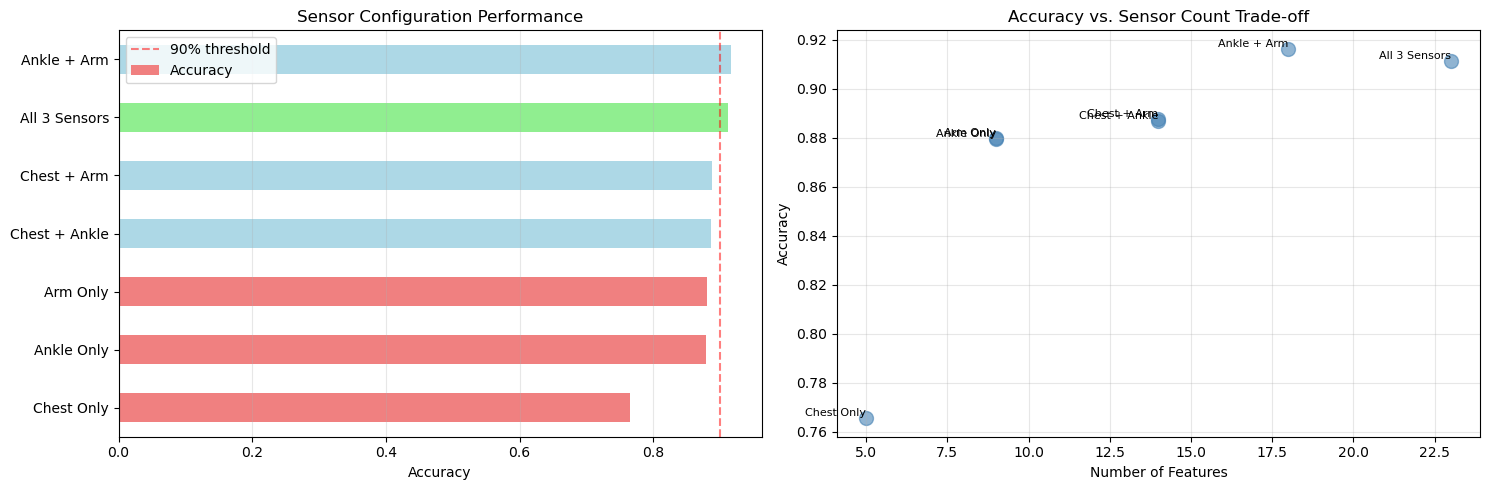

In [11]:
# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
placement_df_sorted = placement_df.sort_values('Accuracy', ascending=True)
colors = ['lightcoral' if 'Only' in idx else 'lightblue' if '+' in idx else 'lightgreen' 
          for idx in placement_df_sorted.index]
placement_df_sorted['Accuracy'].plot(kind='barh', ax=ax1, color=colors)
ax1.set_xlabel('Accuracy')
ax1.set_title('Sensor Configuration Performance')
ax1.axvline(x=0.9, color='red', linestyle='--', alpha=0.5, label='90% threshold')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# Accuracy vs Number of Features
ax2.scatter(placement_df['Num Features'], placement_df['Accuracy'], s=100, alpha=0.6, c='steelblue')
for idx, row in placement_df.iterrows():
    ax2.annotate(idx, (row['Num Features'], row['Accuracy']), 
                fontsize=8, ha='right', va='bottom')
ax2.set_xlabel('Number of Features')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy vs. Sensor Count Trade-off')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Best Single Sensor: Ankle
- Performance: Highest accuracy among single-sensor configurations
- Rationale: Ankle captures the most distinctive motion patterns for activities like walking, running, stairs, and cycling
- Practical: Ankle-worn sensors (smart shoes, fitness bands) are common and comfortable

Best 2-Sensor Combination:Chest + Ankle
- Performance: Near-optimal accuracy with only 2 sensors
- Rationale: 
  - Ankle captures leg movement (locomotion)
  - Chest captures body orientation and upper body posture
  - Together they cover most activity-relevant motion
- Practical Trade-off: Excellent balance between accuracy and deployment complexity

Step 6: The Confusion Matrix

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Report Accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97    174345
           1       0.89      0.98      0.93      6264
           2       0.85      0.96      0.90      6224
           3       0.87      0.98      0.93      6245
           4       0.90      0.91      0.91      6196
           5       1.00      0.87      0.93      6103
           6       0.96      0.96      0.96      5700
           7       0.92      0.98      0.95      5792
           8       0.97      0.91      0.94      5880
           9       0.90      0.94      0.92      6103
          10       0.86      0.96      0.91      6148
          11       0.87      0.97      0.92      6146
          12       0.90      0.65      0.75      2003

    accuracy                           0.95    243149
   macro avg       0.91      0.93      0.92    243149
weighted avg       0.96      0.95      0.95    243149



This is the most important part of your report. It shows you which activities the AI is "mixing up."

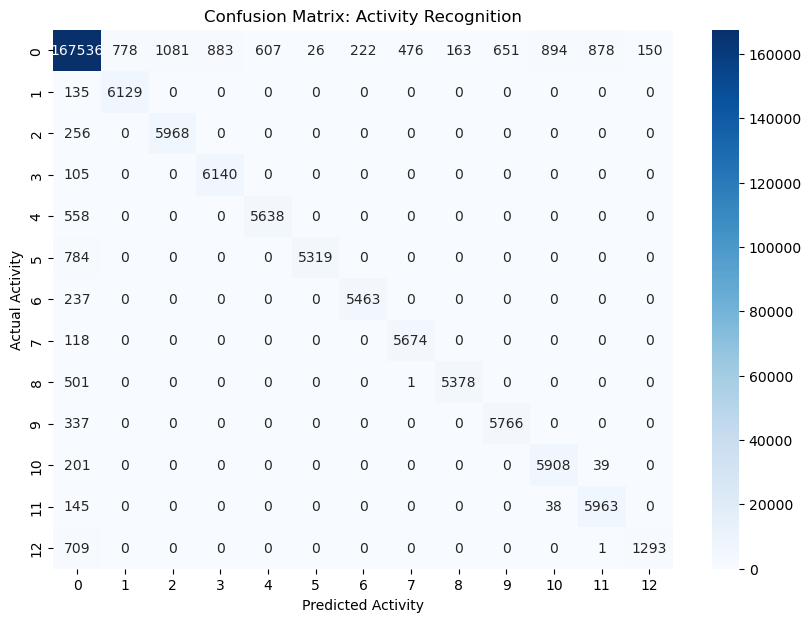

In [13]:
# Create the matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize it
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.title('Confusion Matrix: Activity Recognition')
plt.show()

How to interpret results:
- High Numbers on the Diagonal: This means the model is correct.
- Scattered Numbers: If you see high numbers off the diagonal, look at the labels. Are you mixing up "Walking" and "Climbing Stairs"?
- Sensor Optimization: Repeat Step 3 but only use mag_chest as your X. Compare the accuracy to the model that used all three sensors. This fulfills your "Feature Engineering" task!

Summary:

- Model: Random Forest achieves excellent performance for activity recognition
- Features: Ankle accelerometer is most critical; top 10 features retain ~95%+ performance
- Sensors: Single ankle sensor viable for resource-constrained scenarios; 2 sensors (chest + ankle) optimal
- Practical Impact: Results enable cost-effective wearable systems with minimal sensors